# Ejemplo 2. Filtros de Media Movil.

In [1]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def filtro_media_movil(secuencia, puntos = 2):
    # Esta función se encarga de hacer un filtrado de media movil de N puntos, por defecto está
    # en 2 puntos, se pueden poner los puntos que desee.
    filtrado = []
    for i in range(len(secuencia)):
        aux = 0
        for j in range(puntos):
            if (i-j >= 0):
                aux += secuencia[i-j]
        filtrado.append(aux/2)
    return filtrado

Suponga la señal $x(n)=\delta (n)$. Se quiere pasar a través de un filtro de media movil de 2 puntos.

In [3]:
N = 9                                           # Numero de muestras
n = np.arange(-N//2+1, N//2+1)                  # Vector de muestras
delta = np.zeros(N)                             # vector de ceros
delta[N//2] = 1                                 # Señal escalón
delta_filtrado = filtro_media_movil(delta)      # Señal filtrada

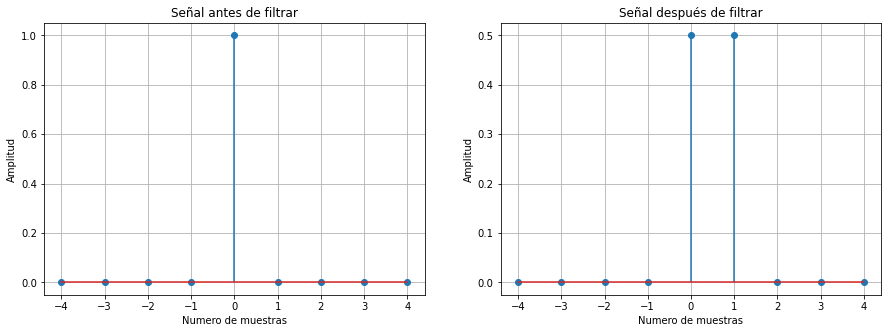

In [4]:
# Grafica de la señal antes y despues
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal antes de filtrar')
plt.stem(n, delta)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal después de filtrar')
plt.stem(n, delta_filtrado)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

Otro ejemplo pero ahora con la función $x(n)=cos(\pi n)$

In [5]:
N = 9                                           # Numero de muestras
x = np.cos(np.pi*n)                             # vector de ceros
x_filtrado = filtro_media_movil(x)      # Señal filtrada

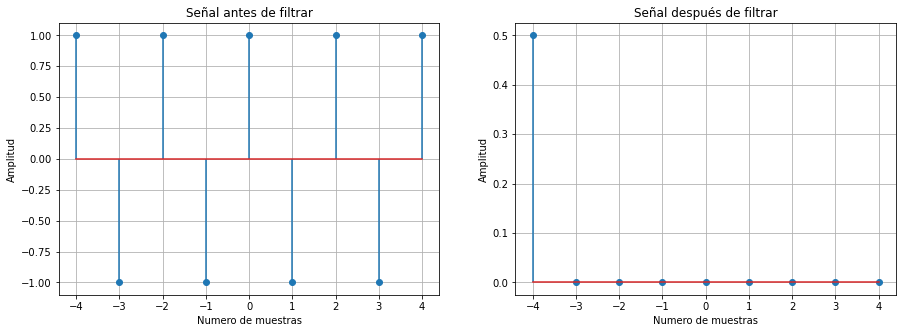

In [6]:
# Grafica de la señal antes y despues
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.title('Señal antes de filtrar')
plt.stem(n, x)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.subplot(122)
plt.title('Señal después de filtrar')
plt.stem(n, x_filtrado)
plt.grid()
plt.xlabel('Numero de muestras')
plt.ylabel('Amplitud')

plt.show()

La señal filtrada de la función anterior muestra un valor de 0.5 en la posición -4 debido a que se hizo con una señal finita, como antes de esta no hay nada se asume que es cero y da como resultado 0.5 al pasar por el filtro. Si se asume la señal infinita (esto no es posible representarlo en un computador), este valor no estaría, todo seria cero ya que todo se cancelaría hasta el infinito.

# Ejemplo 2.1 Filtro de Media Movil con función de librería numpy

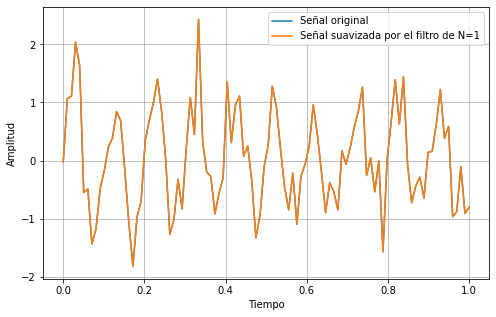

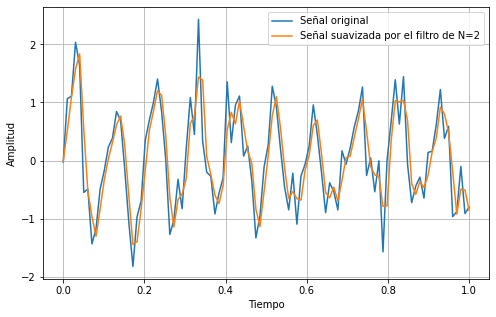

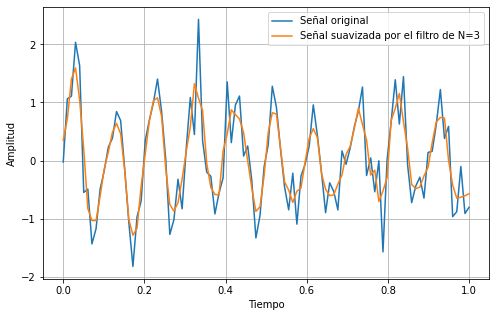

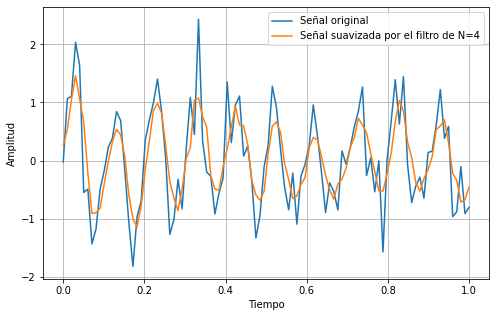

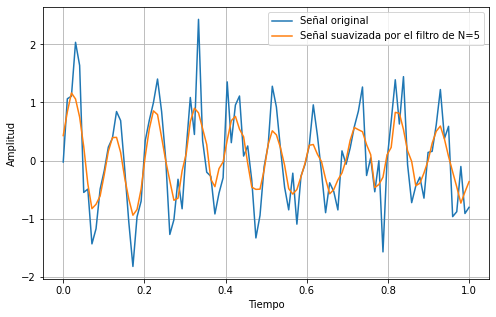

In [8]:
t = np.linspace(0, 1, 100)
x = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(100)

# Definir el tamaño de la ventana del filtro de media móvil en i 
for i in range(5):
    i=i+1
    # Aplicar el filtro de media móvil a la señal
    filtro = np.ones(i) / i
    y = np.convolve(x, filtro, mode='same')
    #Graficar la señal original y suavizada
    plt.figure(figsize=(8,5))
    plt.plot(t, x, label='Señal original')
    plt.plot(t, y, label='Señal suavizada por el filtro de N={}'.format(i))
    plt.legend()
    plt.xlabel('Tiempo')
    plt.ylabel('Amplitud')
    plt.grid()
    plt.show()

De las 5 gráficas generadas anteriormente se puede observar como a medida que se aumenta el tamaño del filtro la señal es suavizada y por esto pierde información en los datos de alta frecuencia. Esto pasa debido a que el principio de funcionamiento es que se aumenta el tamaño del filtro, se están promediando más muestras de la señal original para calcular el valor suavizado. Por esto este filtro es por definición un filtro pasa bajas. 